In [67]:
import numpy as np

gt = np.load("results/long_term_forecast_coffee_TimesNet_custom_Coffee_500Exog.csv_bs16_lrtypeC_ftS_sl52_ll26_pl52_dm8_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/true.npy")

pred = np.load("results/long_term_forecast_coffee_TimesNet_custom_Coffee_500Exog.csv_bs16_lrtypeC_ftS_sl52_ll26_pl52_dm8_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/pred.npy")
dates = np.load("results/long_term_forecast_coffee_TimesNet_custom_Coffee_500Exog.csv_bs16_lrtypeC_ftS_sl52_ll26_pl52_dm8_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/dates.npy")

In [89]:
import pandas as pd
date = dates[177,:,26:].reshape(-1)
date = date.astype(str)
date_s = pd.Series(date)
# convert int date with format %Y%m%d to datetime
date = pd.to_datetime(date_s, format='%Y%m%d')

In [90]:
import pandas as pd

results = pd.DataFrame(columns=["gt", "pred"])

In [91]:
results["gt"] = gt[177,:,:].reshape(-1)
results["pred"] = pred[177,:,:].reshape(-1)

In [92]:
results.set_index(date, inplace=True)

<Axes: >

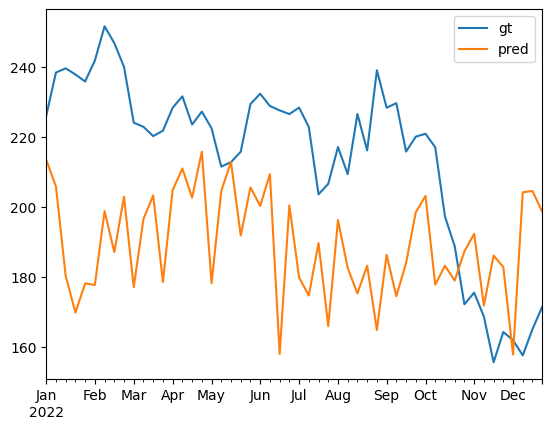

In [93]:
results.plot()

In [29]:
data = pd.read_csv("dataset/pr/outputog.csv")

<Axes: >

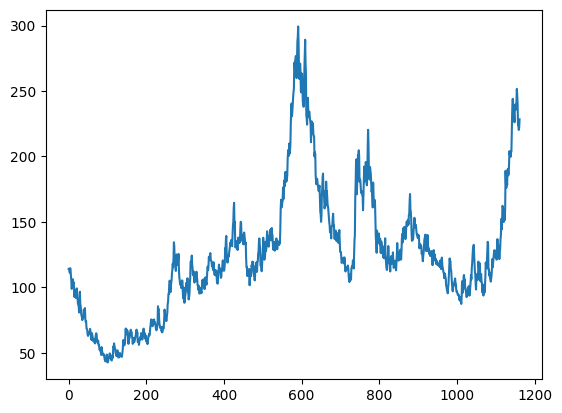

In [31]:
data["value"].plot()

In [32]:
import pandas as pd

data = pd.read_csv("dataset/Coffee Example/Coffee_500Exog.csv")
results = pd.read_csv("dataset/Coffee Example/Coffee_500Exog_results.csv")

In [35]:
data["date"] = pd.to_datetime(data["date"])
results["date"] = pd.to_datetime(results["date"])

data = data.set_index("date", drop=True)
results = results.set_index("date", drop=True)

In [44]:
print(results.index.min())
print(results.index.max())

2021-12-20 00:00:00
2022-12-12 00:00:00


In [38]:
data["results_xrnn"] = results["units"]

In [41]:
data[data["results_xrnn"].notnull()]

results_all_models = data[["value", "results_xrnn"]]

In [94]:
results_all_models["timesnet_results"] = results["pred"]

/tmp/ipykernel_3984054/3342287551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_all_models["timesnet_results"] = results["pred"]


<Axes: xlabel='date'>

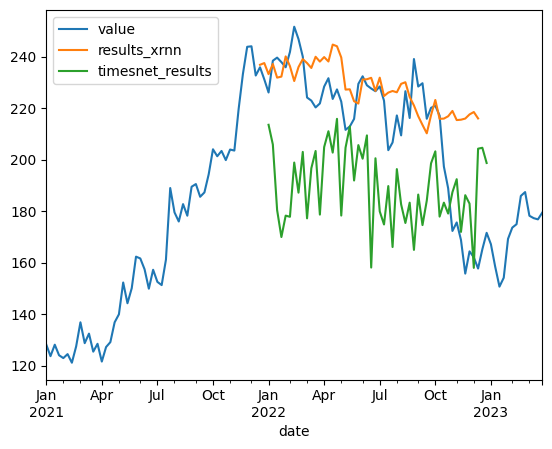

In [95]:
results_all_models[results_all_models.index > "2021-01-01"].plot()

In [51]:
virtual_present = "2021-01-01"
train_data = data[data.index < virtual_present]
test_data = data[data.index >= virtual_present]

In [48]:
results_all_models.to_parquet("results_all_models.parquet")
ram = pd.read_parquet("results_all_models.parquet")
ram

In [50]:
results_all_models.to_csv("results_all_models.csv")
ram = pd.read_csv("results_all_models.csv")
ram

,date,value,results_xrnn
0,2000-01-03,114.15,NaN
1,2000-01-10,114.15,NaN
2,2000-01-17,112.55,NaN
3,2000-01-24,111.20,NaN
4,2000-01-31,114.70,NaN
...,...,...,...
1208,2023-02-27,187.43,NaN
1209,2023-03-06,178.23,NaN
1210,2023-03-13,177.30,NaN
1211,2023-03-20,176.83,NaN


In [21]:
data["date"] = pd.to_datetime(data["date"])

data.set_index("date", inplace=True)
data

,id,value,Exog_1,Exog_2,Exog_3,Exog_4,Exog_5,Exog_6,Exog_7,Exog_8,...,Exog_491,Exog_492,Exog_493,Exog_494,Exog_495,Exog_496,Exog_497,Exog_498,Exog_499,Exog_500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,Coffee,114.15,0.8460,4350,289.7,5.150,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,24.6,24.6,24.60,0.000000,0.0,0.0,0.00,0.000000
2000-01-10,Coffee,114.15,0.8460,4350,286.0,5.195,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,28.1,23.6,25.85,2.760000,0.0,0.0,0.00,0.000000
2000-01-17,Coffee,112.55,0.8550,4350,313.0,5.150,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,30.2,27.2,28.70,4.754286,0.0,0.0,0.00,0.000000
2000-01-24,Coffee,111.20,0.8670,4350,313.6,5.260,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,31.9,24.1,28.00,5.331429,0.0,0.0,0.00,0.000000
2000-01-31,Coffee,114.70,0.8300,4350,307.3,5.327,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,29.2,23.4,26.30,9.227143,0.0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,Coffee,224.15,4.9125,4000,1982.6,25.885,28919.0,2459.0,152.28,1175.0,...,22.50,3.514286,30.4,17.7,24.05,15.768572,24.7,8.3,16.50,0.171429
2022-03-14,Coffee,222.95,4.6190,3923,2002.8,26.190,48078.0,2325.5,155.36,1125.0,...,24.90,14.442857,31.8,17.2,24.50,7.487143,23.6,9.2,16.40,0.685714
2022-03-21,Coffee,220.30,4.7335,3888,1947.4,25.165,36915.0,2252.5,150.59,1134.0,...,23.90,9.600000,31.7,17.5,24.60,17.538572,16.0,10.9,13.45,7.300000


In [24]:
# create a dataframe from pandas series
df = pd.DataFrame([data["value"], data["id"], data["Exog_1"]], index=["value", "id", "Exog_1"]).T
df

,value,id,Exog_1
date,,,
2000-01-03,114.15,Coffee,0.846
2000-01-10,114.15,Coffee,0.846
2000-01-17,112.55,Coffee,0.855
2000-01-24,111.2,Coffee,0.867
2000-01-31,114.7,Coffee,0.83
...,...,...,...
2022-03-07,224.15,Coffee,4.9125
2022-03-14,222.95,Coffee,4.619
2022-03-21,220.3,Coffee,4.7335


In [18]:
data_sub = data[data["date"] >= "2019-01-01"]
data_sub.reset_index(inplace=True, drop=True)
data_sub

,date,id,value,Exog_1,Exog_2,Exog_3,Exog_4,Exog_5,Exog_6,Exog_7,...,Exog_491,Exog_492,Exog_493,Exog_494,Exog_495,Exog_496,Exog_497,Exog_498,Exog_499,Exog_500
0,2019-01-07,Coffee,101.60,2.7110,2803,1419.3,15.786,11110.0,1950.0,73.09,...,24.50,22.485714,32.4,22.2,27.30,11.125714,29.6,12.6,21.10,0.000000
1,2019-01-14,Coffee,103.85,2.7340,2869,1413.7,15.656,11460.0,2002.0,74.22,...,23.50,11.114285,30.2,22.4,26.30,14.697143,30.2,9.9,20.05,0.000000
2,2019-01-21,Coffee,104.95,2.7660,2857,1429.8,15.399,11820.0,1998.0,75.15,...,24.35,8.242857,31.0,22.6,26.80,1.048571,29.8,13.7,21.75,0.000000
3,2019-01-28,Coffee,106.80,2.7830,2830,1445.7,15.699,11965.0,2109.0,74.64,...,24.05,12.057143,30.8,22.2,26.50,7.748571,32.7,15.4,24.05,0.000000
4,2019-02-04,Coffee,103.70,2.8270,2869,1442.4,15.931,12660.0,2127.0,86.93,...,23.50,19.485714,31.9,22.3,27.10,18.235714,31.9,14.0,22.95,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2022-03-07,Coffee,224.15,4.9125,4000,1982.6,25.885,28919.0,2459.0,152.28,...,22.50,3.514286,30.4,17.7,24.05,15.768572,24.7,8.3,16.50,0.171429
166,2022-03-14,Coffee,222.95,4.6190,3923,2002.8,26.190,48078.0,2325.5,155.36,...,24.90,14.442857,31.8,17.2,24.50,7.487143,23.6,9.2,16.40,0.685714
167,2022-03-21,Coffee,220.30,4.7335,3888,1947.4,25.165,36915.0,2252.5,150.59,...,23.90,9.600000,31.7,17.5,24.60,17.538572,16.0,10.9,13.45,7.300000
168,2022-03-28,Coffee,221.85,4.7000,4000,1978.0,25.729,35491.0,2350.5,149.87,...,22.75,10.828571,32.0,16.9,24.45,13.897142,18.7,6.9,12.80,0.657143


In [25]:
data_sub.set_index("date", inplace=True)

In [28]:
data

,id,value,Exog_1,Exog_2,Exog_3,Exog_4,Exog_5,Exog_6,Exog_7,Exog_8,...,Exog_491,Exog_492,Exog_493,Exog_494,Exog_495,Exog_496,Exog_497,Exog_498,Exog_499,Exog_500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,Coffee,114.15,0.8460,4350,289.7,5.150,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,24.6,24.6,24.60,0.000000,0.0,0.0,0.00,0.000000
2000-01-10,Coffee,114.15,0.8460,4350,286.0,5.195,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,28.1,23.6,25.85,2.760000,0.0,0.0,0.00,0.000000
2000-01-17,Coffee,112.55,0.8550,4350,313.0,5.150,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,30.2,27.2,28.70,4.754286,0.0,0.0,0.00,0.000000
2000-01-24,Coffee,111.20,0.8670,4350,313.6,5.260,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,31.9,24.1,28.00,5.331429,0.0,0.0,0.00,0.000000
2000-01-31,Coffee,114.70,0.8300,4350,307.3,5.327,9699.0,1120.0,147.50,625.0,...,0.00,0.000000,29.2,23.4,26.30,9.227143,0.0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,Coffee,224.15,4.9125,4000,1982.6,25.885,28919.0,2459.0,152.28,1175.0,...,22.50,3.514286,30.4,17.7,24.05,15.768572,24.7,8.3,16.50,0.171429
2022-03-14,Coffee,222.95,4.6190,3923,2002.8,26.190,48078.0,2325.5,155.36,1125.0,...,24.90,14.442857,31.8,17.2,24.50,7.487143,23.6,9.2,16.40,0.685714
2022-03-21,Coffee,220.30,4.7335,3888,1947.4,25.165,36915.0,2252.5,150.59,1134.0,...,23.90,9.600000,31.7,17.5,24.60,17.538572,16.0,10.9,13.45,7.300000
